# Wahrscheinlichkeiten

## Hot Hands

Basketballspieler, die mehrere Körbe hintereinander werfen, werden als "hot hand" bezeichnet. Fans und Spieler glauben seit langem an das Phänomen der "heißen Hand", das die Annahme widerlegt, dass jeder Schuss unabhängig vom nächsten ist. In einem [Paper](https://www.cs.colorado.edu/~mozer/Teaching/syllabi/7782/readings/gilovich%20vallone%20tversky.pdf) von Gilovich, Vallone und Tversky aus dem Jahr 1985 wurde jedoch Evidenz gesammelt, die dieser Annahme widersprechen und zeigt, dass aufeinanderfolgende Schüsse unabhängige Ereignisse sind. Diese Arbeit löste eine große Kontroverse aus, die bis heute anhält, wie Sie sehen können, wenn Sie "Hot Hand Basketball" googeln.

Wir erwarten nicht, dass wir diese Kontroverse heute lösen können. In dieser Übung werden wir jedoch einen Ansatz zur Beantwortung von Fragen wie dieser anwenden. Die Ziele dieser Übung bestehen darin, (1) über die Auswirkungen von unabhängigen und abhängigen Ereignissen nachzudenken, (2) zu lernen, wie man Wurfserien in Python simuliert, und (3) eine Simulation mit tatsächlichen Daten zu vergleichen, um festzustellen, ob das Phänomen der *hot hand* real zu sein scheint.

## Erste Schritte

Unsere Untersuchung wird sich auf die Leistung eines Spielers konzentrieren: Der 2020 verstorbene Kobe Bryant von den Los Angeles Lakers. Seine Leistung gegen die Orlando Magic in den NBA-Finals 2009 brachte ihm den Titel des wertvollsten Spielers (MVP) ein, und viele Zuschauer meinten, dass er eine *hot hand* zu haben schien. Laden wir einige Daten aus diesen Spielen und schauen wir uns die ersten Zeilen an.

In [13]:
import pandas as pd
import plotly.express as px

kobe = pd.read_csv("Daten/kobe.csv")

kobe.head()

,vs,game,quarter,time,description,basket
0,ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
1,ORL,1,1,9:07,Kobe Bryant misses jumper,M
2,ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
3,ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher...,H
4,ORL,1,1,7:03,Kobe Bryant makes driving layup,H


Schauen wir uns die Anzahl der gespielten Spiele an.

In [4]:
kobe['game'].nunique()

5

Es wurden fünf Spiele gespielt. NBA-Spiele werden in vier Vierteln ausgetragen. Ist der Punktestand am Ende des 4. Viertels jedoch gleich, werden Verlängerungen gespielt, um das Siegerteam zu ermitteln. Schauen wir nach, ob ein Spiel in die Verlängerung ging.

In [5]:
kobe['quarter'].unique()

array(['1', '2', '3', '4', '1OT'], dtype=object)

In [6]:
kobe[kobe['quarter'] == '1OT']

,vs,game,quarter,time,description,basket
53,ORL,2,1OT,4:13,Kobe Bryant misses 22-foot jumper,M
54,ORL,2,1OT,2:17,Kobe Bryant makes 11-foot two point shot,H
80,ORL,4,1OT,4:13,Kobe Bryant makes 11-foot jumper,H
81,ORL,4,1OT,3:32,Kobe Bryant makes 19-foot jumper,H
82,ORL,4,1OT,2:49,Kobe Bryant misses 10-foot jumper,M
83,ORL,4,1OT,1:58,Kobe Bryant misses 18-foot jumper,M
84,ORL,4,1OT,0:47,Kobe Bryant misses 15-foot jumper,M


Wir können sehen, dass Spiel 2 und Spiel 4 in die Verlängerung gingen (codiert als "1OT").

Bevor wir beginnen, müssen wir sicherstellen, dass die Daten richtig nach `game` und `quarter` sortiert sind.

In [7]:
kobe

,vs,game,quarter,time,description,basket
0,ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
1,ORL,1,1,9:07,Kobe Bryant misses jumper,M
2,ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
3,ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher...,H
4,ORL,1,1,7:03,Kobe Bryant makes driving layup,H
...,...,...,...,...,...,...
128,ORL,3,4,3:33,Bryant Layup Shot: Missed,M
129,ORL,3,4,2:02,Bryant 3pt Shot: Missed,M
130,ORL,3,4,00:23.9,Bryant 3pt Shot: Missed,M
131,ORL,3,4,00:06.9,Bryant 3pt Shot: Missed,M


Wir wissen, dass insgesamt fünf Spiele gespielt wurden. Die letzte Zeile zeigt jedoch die Datensätze von Spiel 3. Daher sollten wir die Daten nach `game` und `quarter` in aufsteigender Reihenfolge sortieren.

Ersetzen wir zunächst "1OT" durch "5" für die Spalte `quarter`, um die Sortierung zu vereinfachen.

In [8]:
kobe['quarter'] = kobe['quarter'].replace('1OT', '5') 
kobe['quarter'] = kobe['quarter'].astype(int)

Dann können wir die Daten nach `game` und `quarter` in aufsteigender Reihenfolge sortieren und schließlich über das Konzept der Wahrscheinlichkeit sprechen.

In [10]:
kobe.sort_values(by = ['game', 'quarter'], ascending = [True, True], ignore_index = True, inplace = True)  
# Hinweis: Die Zeit ist bereits in absteigender Reihenfolge für jedes Spiel und jedes Viertel angegeben, 
# so dass wir diese nicht sortieren müssen.
kobe

,vs,game,quarter,time,description,basket
0,ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
1,ORL,1,1,9:07,Kobe Bryant misses jumper,M
2,ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
3,ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher...,H
4,ORL,1,1,7:03,Kobe Bryant makes driving layup,H
...,...,...,...,...,...,...
128,ORL,5,4,6:22,Kobe Bryant misses 18-foot jumper,M
129,ORL,5,4,4:26,Kobe Bryant misses 27-foot three point jumper,M
130,ORL,5,4,3:12,Kobe Bryant misses 27-foot three point jumper,M
131,ORL,5,4,2:38,Kobe Bryant makes 9-foot two point shot,H


In diesem DataFrame wird in jeder Zeile ein Wurf von Kobe Bryant aufgezeichnet. Hat er getroffen (einen Korb erzielt), wird in der Spalte `basket` ein Treffer (H für *hit*) vermerkt, andernfalls ein Fehlwurf (M für *miss*).

Wenn man sich nur die Aneinanderreihung von Treffern und Fehlwürfen ansieht, kann es schwierig sein, zu beurteilen, ob Kobe eine *hat hand* hatte oder nicht. Eine Möglichkeit, sich diesem Problem zu nähern, besteht darin, die Annahme zu berücksichtigen, dass Werfer mit einer *hot hand* dazu neigen, eine Serie von Treffern zu erzielen. Für diese Übung definieren wir die Länge einer Serie als die ***Anzahl der aufeinanderfolgenden Körbe bis zu einem Fehlschuss***.

In Spiel 1 hatte Kobe zum Beispiel die folgende Abfolge von Treffern und Fehlwürfen bei seinen neun Wurfversuchen im ersten Viertel:

##### `H M | M | H H M | M | M | M | M`

Um dies zu verifizieren, verwenden Sie den folgenden Befehl:

In [8]:
kobe['basket'][0:9]

0    H
1    M
2    M
3    H
4    H
5    M
6    M
7    M
8    M
Name: basket, dtype: object

Innerhalb der neun Schussversuche gibt es sieben Serien, die oben durch ein "|" getrennt sind. Ihre Längen sind eins, null, zwei, null, null, null, null (in der Reihenfolge ihres Auftretens).

### ✏️ Aufgabe 1
Was bedeutet die Länge einer Serie von 1, d.h. wie viele Treffer und Fehlschüsse sind in einer Serie von 1? Was ist mit einer Serie von 0?

Die benutzerdefinierte Funktion `calc_streak()` kann verwendet werden, um die Länge aller Wurfserien zu berechnen.

In [12]:
def calc_streak(x):
    all_shoots = list(x)
    streak, count = [], 0
    
    for shoot in all_shoots:
        if shoot == 'H':
            count += 1
        elif shoot == 'M':
            streak.append(count)
            count = 0
    
    # Wenn der letzte Schuss ein Treffer ist, hänge die letzte Häufigkeit auch an die Serie an.
    if all_shoots[-1] == 'H':  
        streak.append(count)
        
    return streak  
    
kobe_streak = calc_streak(kobe['basket'])
print(kobe_streak)

[1, 0, 2, 0, 0, 0, 3, 2, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 4, 1, 0, 1, 0, 1, 0, 1, 4, 3, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1]


Wir können die Verteilung der Längen aller Wurfserien mit einem Balkendiagramm betrachten.

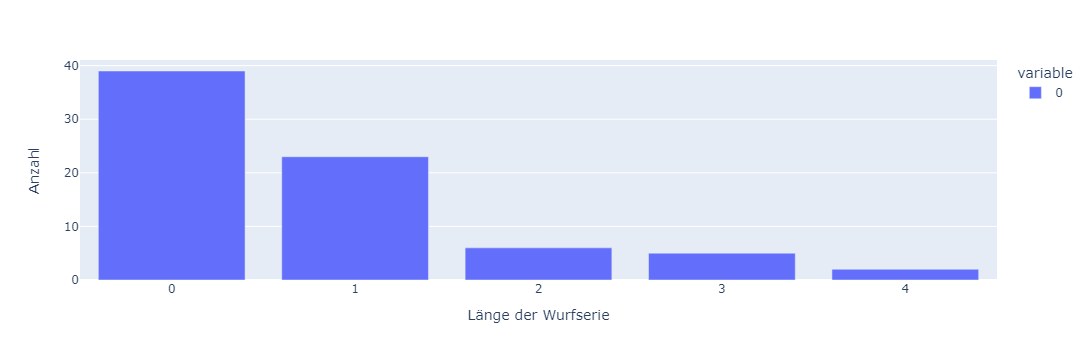

In [19]:
kobe_streak_counts = pd.Series(kobe_streak).value_counts().sort_index()
px.bar(kobe_streak_counts, labels={"index": "Länge der Wurfserie", "value": "Anzahl"})

Beachten Sie, dass wir statt eines Histogramms ein Balkendiagramm erstellt haben. Ein Balkendiagramm ist hier vorzuziehen, da unsere Variable diskret - Häufigkeiten - und nicht kontinuierlich ist.

### ✏️ Aufgabe 2
Beschreiben Sie die Verteilung der Länge von Kobes Serien in den NBA-Finals 2009 mittels Kennzahlen und geeigneter Visualisierung. Wie lang war seine typische Serie? Wie lang war seine längste Serie von Körben?

## Verglichen womit?

Wir haben gezeigt, dass Kobe einige lange Serien hatte, aber sind sie lang genug, um die Annahme zu stützen, dass er *hot hands* hatte? Womit können wir sie vergleichen?

Um diese Fragen zu beantworten, müssen wir auf den Begriff der *Unabhängigkeit* zurückkommen. Zwei Zufallsvorgänge sind unabhängig, wenn das Ergebnis des einen Vorgangs keinen Einfluss auf das Ergebnis des zweiten hat. Wenn jeder Schuss, den ein Spieler abgibt, ein unabhängiger Vorgang ist, hat ein gelungener oder misslungener erster Schuss keinen Einfluss auf die Wahrscheinlichkeit, dass der zweite Schuss gelingt oder misslingt.

Ein Schütze mit *hot hands* wird Würfe abgeben, die *nicht* unabhängig voneinander sind. Wenn der Schütze seinen ersten Wurf macht, hat er nach dem Hot-Hand-Modell eine *höhere* Wahrscheinlichkeit, dass sein zweiter Wurf ein Treffer ist.

Nehmen wir für einen Moment an, dass das Hot-Hand-Modell für Kobe gilt. Während seiner Karriere beträgt die Wahrscheinlichkeit, dass Kobe einen Korb erzielt (d. h. seine Trefferquote), etwa 45 %, oder in Wahrscheinlichkeitsschreibweise,

$P(\text{Wurf} 1 = H) = 0.45$

Wenn er den ersten Wurf macht und *hot hands* hat (keine unabhängigen Würfe), dann steigt die Wahrscheinlichkeit, dass sein zweiter Wurf ein Treffer ist, auf, sagen wir, 60 %,

$P(\text{Wurf} 2 = H|\text{Wurf} 1 = H) = 0.60$

Als Ergebnis dieser erhöhten Wahrscheinlichkeit würde man erwarten, dass Kobe längere Serien hat. Vergleichen Sie dies mit der skeptischen Perspektive, bei der Kobe *keine* *hot hands* hat (bei der jeder Wurf unabhängig vom nächsten ist). Wenn er seinen ersten Wurf trifft, ist die Wahrscheinlichkeit, dass er den zweiten macht, immer noch 0.45.

$P(\text{Wurf} 2 = H|\text{Wurf} 1 = H) = 0.45$

Mit anderen Worten: Der erste Wurf hat keinen Einfluss auf die Wahrscheinlichkeit, dass sein zweiter Wurf ein Treffer ist. Wenn Kobes Würfe unabhängig sind, dann hat er die gleiche Wahrscheinlichkeit, jeden Wurf zu treffen, unabhängig von seinen früheren Würfen: 45%.

Nachdem wir nun die Situation in Bezug auf unabhängige Würfe formuliert haben, kehren wir zu der Frage zurück: Wie können wir feststellen, ob die Serien von Kobe lang genug sind, um darauf hinzuweisen, dass er *hot hands* hatte? Antwort: Wir können die Länge seiner Serien mit jemandem vergleichen, der keine *hot hands* hat: ein unabhängiger Werfer.

## Simulationen in Python

Wir haben zwar keine Daten von einem Schützen, von dem wir wissen, dass er unabhängig wirft, aber diese Art von Daten lässt sich in Python sehr leicht simulieren. Bei einer Simulation legen Sie die Grundregeln eines Zufallsprozesses fest, und der Computer verwendet dann Zufallszahlen, um ein Ergebnis zu erzeugen, das diesen Regeln entspricht. Als einfaches Beispiel können Sie das Werfen einer fairen Münze mit folgendem Code simulieren:

In [22]:
import numpy as np

outcomes = np.array(['Kopf', 'Zahl'])
print(np.random.choice(outcomes))

Kopf


Den Vektor `outcomes` kann man sich wie einen Hut vorstellen, in dem sich zwei Zettel befinden: auf einem Zettel steht `Kopf`, auf dem anderen `Zahl`. Die Funktion `random.choice()` zieht einen Zettel aus dem Hut und sagt uns, ob es Kopf oder Zahl war.

Führen Sie den zweiten oben aufgeführten Befehl mehrmals aus. Genau wie beim Werfen einer Münze werden Sie manchmal Kopf und manchmal Zahl erhalten, aber auf lange Sicht werden Sie ungefähr die gleiche Anzahl von beiden erhalten.

Wenn Sie eine faire Münze 100 Mal werfen wollen, können Sie die Funktion entweder 100 Mal ausführen oder, einfacher, das Argument `size` anpassen, das bestimmt, wie viele Stichproben gezogen werden sollen (das Argument `replace = True` zeigt an, dass wir den Zettel zurück in den Hut legen, bevor wir erneut ziehen). Speichern Sie das resultierende Array von Kopf und Zahl in einem neuen Objekt namens `sim_fair_coin`.

In [23]:
sim_fair_coin = np.random.choice(outcomes, size = 100, replace = True)

Um die Ergebnisse dieser Simulation zu sehen, verwenden Sie `unique()`, um die Häufigkeiten von Kopf und Zahl zu zählen:

In [24]:
unique, counts = np.unique(sim_fair_coin, return_counts = True)
print(np.asarray((unique, counts)).T)

[['Kopf' '56']
 ['Zahl' '44']]


Da es nur zwei Elemente in `outcomes` gibt, ist die Wahrscheinlichkeit, dass wir eine Münze "werfen" und sie Kopf ergibt, 0.5. Angenommen, wir versuchen, eine ungerechte Münze zu simulieren, von der wir wissen, dass sie nur in 20% der Fälle Kopf zeigt. Wir können dies abbilden, indem wir ein Argument namens `p` hinzufügen, das die Wahrscheinlichkeiten für jeden Eintrag im Array angibt.

In [28]:
sim_unfair_coin = np.random.choice(outcomes, size = 100, replace = True, p = [0.2, 0.8])
unique, counts = np.unique(sim_unfair_coin, return_counts = True)
print(np.asarray((unique, counts)).T)

[['Kopf' '23']
 ['Zahl' '77']]


`p = [0.2, 0.8]` bedeutet, dass wir für die beiden Elemente im Ergebnisfeld das erste, "Kopf", mit einer Wahrscheinlichkeit von 0.2 und das zweite, "Zahl", mit einer Wahrscheinlichkeit von 0.8 auswählen wollen. Man kann sich den Ergebnisraum auch als eine Tüte mit 10 Chips vorstellen, wobei 2 Chips mit "Kopf" und 8 Chips mit "Zahl" beschriftet sind. Bei jeder Ziehung beträgt die Wahrscheinlichkeit, einen Chip mit der Aufschrift "Kopf" zu ziehen, 20 %, die Wahrscheinlichkeit, einen Chip mit der Aufschrift "Zahl" zu ziehen, 80 %.

### ✏️ Aufgabe 3
In der Simulation, in der Sie die ungerechte Münze 100 Mal geworfen haben, wie viele Würfe ergaben Kopf?

In gewissem Sinne haben wir den Zettel, auf dem "Kopf" steht, verkleinert, so dass die Wahrscheinlichkeit, dass er gezogen wird, geringer ist, und den Zettel, auf dem "Zahl" steht, vergrößert, so dass die Wahrscheinlichkeit, dass er gezogen wird, größer ist. Als wir die faire Münze simuliert haben, waren beide Zettel gleich groß. Dies geschieht standardmäßig, wenn Sie kein `p`-Argument angeben; alle Elemente im Array `outcomes` haben die gleiche Wahrscheinlichkeit, gezogen zu werden.

## Simulation des unabhängigen Werfers

Bei der Simulation eines Basketballspielers mit unabhängigen Würfen kommt der gleiche Mechanismus zum Einsatz wie bei der Simulation eines Münzwurfs. Um einen aussagekräftigen Vergleich zwischen Kobe und unserem simulierten unabhängigen Schützen anstellen zu können, müssen wir sowohl ihre Trefferquoten als auch die Anzahl ihrer Schussversuche angleichen.

In [29]:
outcomes = np.array(['H', 'M'])
sim_basket = np.random.choice(outcomes, size = 133, replace = True, p = [0.45, 0.55])

Mit den als `sim_basket` gespeicherten Simulationsergebnissen haben wir die notwendigen Daten, um Kobe mit unserem unabhängigen Schützen zu vergleichen. Wir können uns die Daten von Kobe zusammen mit unseren simulierten Daten ansehen.

In [35]:
print(np.array(kobe['basket']))

['H' 'M' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'H' 'H' 'M' 'M' 'H'
 'H' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'M' 'H'
 'M' 'M' 'H' 'H' 'H' 'H' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'M'
 'H' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M' 'M' 'M' 'H' 'M' 'M' 'M' 'M'
 'H' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'M'
 'M' 'H' 'M' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'M' 'H' 'M'
 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'M' 'H' 'M' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'H'
 'M' 'H' 'M' 'M' 'M' 'M' 'H']


In [36]:
print(sim_basket)  # Beachten Sie, dass sich die Ergebnisse von sim_basket jedes Mal ändern, wenn Sie die obige Simulation erneut durchführen.

['H' 'H' 'M' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'H' 'M' 'M' 'M' 'M' 'M' 'H' 'H' 'H' 'M' 'M' 'H' 'H' 'H' 'H' 'M' 'M' 'M'
 'H' 'M' 'H' 'H' 'H' 'M' 'M' 'H' 'H' 'M' 'H' 'H' 'M' 'H' 'H' 'M' 'M' 'M'
 'M' 'M' 'M' 'H' 'H' 'H' 'H' 'H' 'H' 'M' 'H' 'H' 'H' 'M' 'M' 'H' 'H' 'H'
 'H' 'M' 'M' 'M' 'M' 'H' 'M' 'H' 'M' 'H' 'M' 'H' 'H' 'M' 'H' 'M' 'M' 'H'
 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'M' 'M' 'M' 'H' 'H' 'M'
 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'M' 'M' 'H' 'M' 'H' 'M' 'H' 'H' 'H' 'M' 'M'
 'H' 'M' 'H' 'M' 'M' 'H' 'M']


Beide Datensätze repräsentieren die Ergebnisse von 133 Schussversuchen, jeweils mit der gleichen Trefferquote von 45 %. Wir wissen, dass unsere simulierten Daten von einem Schützen stammen, der unabhängige Schüsse hat. Das heißt, wir wissen, dass der simulierte Schütze keine heiße Hand hat.

## Vergleich zwischen Kobe Bryant und dem unabhängigen Werfer
### ✏️ Aufgabe 4
Berechnen Sie mit Hilfe von `calc_streak()` die Serienlängen von `sim_basket`. Beschreiben Sie die Verteilung der Länge der Serien. Wie lang ist die typische Serie für diesen simulierten unabhängigen Schützen mit einer Trefferquote von 45 %? Wie lang ist die längste Serie von Körben des Spielers bei 133 Schüssen?

### ✏️ Aufgabe 5
Wenn Sie die Simulation des unabhängigen Schützen ein zweites Mal durchführen würden, welche Verteilung der Serien würden erwarten verglichen mit der Verteilung, die aktuell in `sim_basket` gespeichert ist? Genau die gleiche? Einigermaßen ähnlich? Völlig anders? Erläutern Sie Ihre Überlegungen.

### ✏️ Aufgabe 6
Wie sieht die Verteilung der Serienlänge von Kobe Bryant im Vergleich zur Verteilung der Serienlänge des simulierten Schützen aus? Finden Sie anhand dieses Vergleichs Belege dafür, dass das Modell der *hot hand* zu Kobes Wurfverhalten passt? Erläutern Sie.

---

Diese Übung ist eine deutsche Übersetzung der Übungen aus OpenIntro Statistics von Andrew Bray und Mine Çetinkaya-Rundel (https://www.openintro.org/book/os/). Die Python Adaption stammt von David Akman und Imran Ture (www.featureranking.com).